In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split as sk_split

import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.feature_extraction import DictVectorizer as DV

# import BeautifulSoup and pyQuery to scrape HTML pages
from bs4 import BeautifulSoup as bs
# from pyquery import PyQuery as pq
import requests

# import musicbrainz
# import musicbrainzngs as mb

/Users/linyingzhang/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load data

In [3]:
# read information on the users
# can have blanks
profiles = pd.read_csv("data/profiles.csv")
profiles.head()

,user,sex,age,country
0,fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d,f,25.0,Sweden
1,5909125332c108365a26ccf0ee62636eee08215c,m,29.0,Iceland
2,d1867cbda35e0d48e9a8390d9f5e079c9d99ea96,m,30.0,United States
3,63268cce0d68127729890c1691f62d5be5abd87c,m,21.0,Germany
4,02871cd952d607ba69b64e2e107773012c708113,m,24.0,Netherlands


In [4]:
# read information on the artists
# can have blanks
artists = pd.read_csv("data/artists.csv")
artists.head()

,artist,name
0,03098741-08b3-4dd7-b3f6-1b0bfa2c879c,Liars
1,69c4cc43-8163-41c5-ac81-30946d27bb69,CunninLynguists
2,7a2e6b55-f149-4e74-be6a-30a1b1a387bb,The Desert Sessions
3,7002bf88-1269-4965-a772-4ba1e7a91eaa,Glenn Gould
4,dbf7c761-e332-467b-b4d9-aafe06bbcf8f,G. Love & Special Sauce


In [5]:
print profiles.shape
print artists.shape

(233286, 4)
(2000, 2)


In [6]:
# read in training data
df_train = pd.read_csv("data/train.csv")
df_train.head()

,user,artist,plays
0,eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03,5a8e07d5-d932-4484-a7f7-e700793a9c94,554
1,44ce793a6cd9d20f13f4a576a818ef983314bb5d,a3a92047-be1c-4f3e-8960-c4f8570984df,81
2,da9cf3f557161d54b76f24db64be9cc76db008e3,eeb1195b-f213-4ce1-b28c-8565211f8e43,708
3,8fa49ab25d425edcf05d44bfc1d5aea895287d81,a1419808-65d3-4d40-998c-1a0bac65eabc,265
4,b85fcaef67d2669cd99b334b5e8c8705263db2cf,a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432,220


In [7]:
# read in training data
df_test = pd.read_csv("data/test.csv")
df_test.head()

,Id,user,artist
0,1,306e19cce2522fa2d39ff5dfc870992100ec22d2,4ac4e32b-bd18-402e-adad-ae00e72f8d85
1,2,9450d351278df4938bdea4ed86aec940a4e927ac,1f574ab1-a46d-4586-9331-f0ded23e0411
2,3,801909d6955f59033c88595d3d7f8a6a5dcd53cc,3eb72791-6322-466b-87d3-24d74901eb2d
3,4,e3ed47445c127fbeff47fb58f6bbf2f3b4535d82,61604b45-8a91-4e33-a1b6-45d7b1fec4e5
4,5,a73f46652103f3a5f7429159310f6928f79644aa,5dfdca28-9ddc-4853-933c-8bc97d87beec


In [8]:
print df_train.shape
print df_test.shape

(4154804, 3)
(4154804, 3)


In [10]:
# all users and artists in the test set have appeared in the training set
# testuser_existence = df_test['user'].isin(df_train['user'])
# print sum(testuser_existence == 1)
# print sum(testuser_existence == 0)

# testart_existence = df_test['artist'].isin(df_train['artist'])
# print sum(testart_existence == 1)
# print sum(testart_existence == 0)

In [11]:
# artist_genres = {}
# artist_n = len(artists)

# # scrape musicbrainz page for each artist
# for artist in range(artist_n):
#     # retrieve page
#     a = artists.iloc[artist][0]
#     mb_page = "https://musicbrainz.org/artist/" + str(a)
#     mb_page_get = requests.get(mb_page)
#     soup = BeautifulSoup(mb_page_get.text, "html.parser")
    
#     # We are looking for a particular "li" element on the MusicBrainz page
#     # This finds the Wikipedia page link on the page
#     li_class = soup.find("li", attrs={"class": "wikipedia-favicon"})
#     if li_class == None:
#         artist_genres[a] = ['NA']
#         continue
#     wiki_link = li_class.find('a')['href']
    
#     # Get the wikipedia page for the artist
#     wiki_page_get = requests.get("https:" + wiki_link)
#     wiki_page = wiki_page_get.text

#     # extract the genres from the wikipedia page
#     m = 0
#     urls = []
#     genres = []
#     for th in pq(wiki_page)(".infobox tr th"):
#         if pq(th).text() == "Genres":
#             for e in pq(th).nextAll("td a"):
#                 if pq(e).attr.href.find("#cite_note") == -1:
#                     urls.append(pq(e).attr.href)
#                     genres.append(pq(e).attr.title)
#                     m = 1
#     if (m == 0):
#         genres = ['NA']
    
#     artist_genres[a] = genres

# artist_genres

In [12]:
# # create one-hot encoded matrix detailing the genres of each artist

# # total list of possible genres
# set_of_genres = set([])
# for value in artist_genres.values():
#     for gen in value:
#         set_of_genres.add(gen)

# # initialize to 0 for number of appearances of each genre
# for genr in set_of_genres:
#     artists[genr] = 0

# # Label each genre with 1 if artist is that genre
# for art in range(artist_n):
#     id_ = artists.iloc[art]["artist"]
#     for gen in artist_genres[id_]:
#         artists.loc[art, gen] = 1

In [13]:
# #save the artists into json file
# artists.to_json("artist_genres.json")

# User activity
1. counts: how many artist each user listens to in the training set
2. user_plays: how many plays each user have on all artists

In [8]:
# calculate the number of instances of each user in the training data
user_active = df_train.drop(['plays'],axis = 1).groupby(["user"]).count()
user_active.columns = ["number_artists_listen_to"]
user_active['user'] = user_active.index
profiles  = profiles.merge(user_active, how="outer")
profiles.head()

,user,sex,age,country,number_artists_listen_to
0,fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d,f,25.0,Sweden,20
1,5909125332c108365a26ccf0ee62636eee08215c,m,29.0,Iceland,15
2,d1867cbda35e0d48e9a8390d9f5e079c9d99ea96,m,30.0,United States,20
3,63268cce0d68127729890c1691f62d5be5abd87c,m,21.0,Germany,14
4,02871cd952d607ba69b64e2e107773012c708113,m,24.0,Netherlands,16


In [9]:
# calculate the total number of plays of each user in the training data
user_play = df_train.drop(['artist'],axis = 1).groupby(["user"]).sum()
user_play.columns = ["user_plays"]
user_play['user'] = user_play.index
profiles  = profiles.merge(user_play, how="outer")
profiles.head()

,user,sex,age,country,number_artists_listen_to,user_plays
0,fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d,f,25.0,Sweden,20,1723
1,5909125332c108365a26ccf0ee62636eee08215c,m,29.0,Iceland,15,6316
2,d1867cbda35e0d48e9a8390d9f5e079c9d99ea96,m,30.0,United States,20,632
3,63268cce0d68127729890c1691f62d5be5abd87c,m,21.0,Germany,14,76680
4,02871cd952d607ba69b64e2e107773012c708113,m,24.0,Netherlands,16,2865


In [16]:
profiles.shape

(233286, 6)

# Artist popularity
1. counts: how many people listen to each artist
2. artist_plays: how many times each artist has been played by all users

In [10]:
# calculate the number of "plays" for each artist
item_popularity = df_train.drop(['plays'],axis = 1).groupby(["artist"]).count()
item_popularity.columns = ["listen_by_number_users"]
item_popularity["artist"] = item_popularity.index
artists = artists.merge(item_popularity,how = "outer")
artists.head()

,artist,name,listen_by_number_users
0,03098741-08b3-4dd7-b3f6-1b0bfa2c879c,Liars,847
1,69c4cc43-8163-41c5-ac81-30946d27bb69,CunninLynguists,1022
2,7a2e6b55-f149-4e74-be6a-30a1b1a387bb,The Desert Sessions,668
3,7002bf88-1269-4965-a772-4ba1e7a91eaa,Glenn Gould,839
4,dbf7c761-e332-467b-b4d9-aafe06bbcf8f,G. Love & Special Sauce,572


In [11]:
# calculate the total number of plays of each artist in the training data
artist_play = df_train.drop(['user'],axis = 1).groupby(["artist"]).sum()
artist_play.columns = ["artist_plays"]
artist_play['artist'] = artist_play.index
artists  = artists.merge(artist_play, how="outer")
print artists.shape
artists.head()

(2000, 4)


,artist,name,listen_by_number_users,artist_plays
0,03098741-08b3-4dd7-b3f6-1b0bfa2c879c,Liars,847,184560
1,69c4cc43-8163-41c5-ac81-30946d27bb69,CunninLynguists,1022,333863
2,7a2e6b55-f149-4e74-be6a-30a1b1a387bb,The Desert Sessions,668,138321
3,7002bf88-1269-4965-a772-4ba1e7a91eaa,Glenn Gould,839,241348
4,dbf7c761-e332-467b-b4d9-aafe06bbcf8f,G. Love & Special Sauce,572,115000


# work with new one-hot encoded artist genres dataframe

In [12]:
# read in the artists' info(with all genres) from a json file
artists_onehot = pd.read_json("data/artist_genres.json")
del artists_onehot['name']
artists_onehot.shape

(2000, 663)

In [13]:
# merge artists and artists one-hot
del artists['name']
artists_merge = pd.merge(artists, artists_onehot, how='inner', on='artist')
print artists_merge.shape
artists_merge.head()

(2000, 665)


,artist,listen_by_number_users,artist_plays,2 Tone,2 Tone (music genre),2-Tone,2-step garage,Acid house,Acid jazz,Acid rock,...,Western music (North America),Wikipedia:Citation needed,Witch house (music genre),Wonky pop,Word play,World Music,World music,Worldbeat,Yass (music),Yé-yé
0,03098741-08b3-4dd7-b3f6-1b0bfa2c879c,847,184560,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,69c4cc43-8163-41c5-ac81-30946d27bb69,1022,333863,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7a2e6b55-f149-4e74-be6a-30a1b1a387bb,668,138321,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7002bf88-1269-4965-a772-4ba1e7a91eaa,839,241348,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,dbf7c761-e332-467b-b4d9-aafe06bbcf8f,572,115000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Kmeans on artists

In [14]:
# np.mean(artists_merge.sum(axis=1)) # average each artist belongs to 3.4 genres
# sum(artists_merge.sum(axis=0) >=20) # 76 genres have more than 20 artists

# drop the gernes with less than 20 artists 
column_to_drop = artists_merge.sum(axis=0) < 20

artists_merge_dropcol = artists_merge.drop(artists_merge.columns[column_to_drop], axis= 1)
artists_merge_dropcol.shape
row_minority = artists_merge_dropcol.iloc[:,3:].sum(axis = 1) == 0
artists_merge_dropcol['minority_genres'] = 0
artists_merge_dropcol['minority_genres'][row_minority] = 1
print sum(row_minority)
print artists_merge_dropcol['minority_genres'].sum(axis=0)
print artists_merge_dropcol.shape

108
108
(2000, 78)


/Users/linyingzhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
artists_array = artists_merge_dropcol.drop('artist', axis = 1).values
artists_array = preprocessing.normalize(artists_array, axis = 0)
K = [20, 40, 80, 160, 320, 640, 1280]
labels = []
score = []
for i in range(len(K)):
    kmeans_artists = KMeans(n_clusters=K[i], init='k-means++', n_init=10, max_iter=300)
    labels.append(kmeans_artists.fit_predict(artists_array))
    score.append(kmeans_artists.inertia_)

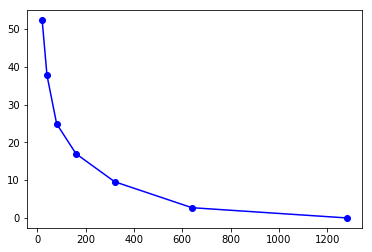

In [123]:
# plot the inertia to determine K
# choose K=200
plt.plot([20, 40, 80, 160, 320, 640, 1280], score, 'bo-')
plt.show()

In [27]:
artists_array = artists_merge_dropcol.drop('artist', axis = 1).values
artists_array = preprocessing.normalize(artists_array, axis = 0)
K=200
kmeans_artists = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=3000)
kmeans_artists.fit(artists_array)
artists_labels = kmeans_artists.labels_

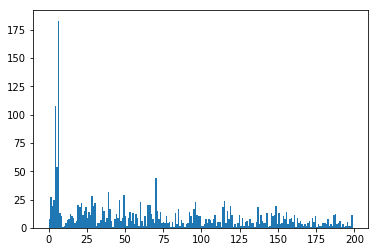

In [28]:
# add label to artists dataframe
artists_merge_dropcol['cluster_label'] = artists_labels
plt.hist(artists_labels, bins = 200)
# plt.ylim([0, 100])
plt.show() # cluster distribution

In [30]:
artists_merge_dropcol.to_csv('artists_labels.csv')

# one-hot encoded user dataframe

In [240]:
# check for missing values
print sum(pd.isnull(profiles['sex']))
print sum(pd.isnull(profiles['age']))
print sum(pd.isnull(profiles['country']))

19535
44842
0


In [241]:
# fill in median for age
profiles['age'].fillna(profiles['age'].median(), inplace = True)
print sum(pd.isnull(profiles['age']))
# fill in missing values for sex, and country as NA
profiles['sex'].fillna('NA', inplace = True)
profiles['country'].fillna('NA', inplace = True)
# onehot encode sex and country
sex_dummy = pd.get_dummies(profiles['sex'])
country_dummy = pd.get_dummies(profiles['country'])

0


In [242]:
profiles_dummy = pd.concat([profiles, sex_dummy, country_dummy], axis = 1)
del profiles_dummy['sex']
del profiles_dummy['country']
print profiles_dummy.shape
profiles_dummy.head()

(233286, 246)


,user,age,number_artists_listen_to,user_plays,NA,f,m,Afghanistan,Albania,Algeria,...,Vanuatu,Venezuela,Viet Nam,"Virgin Islands, British","Virgin Islands, U.s.",Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d,25.0,20,1723,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5909125332c108365a26ccf0ee62636eee08215c,29.0,15,6316,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,d1867cbda35e0d48e9a8390d9f5e079c9d99ea96,30.0,20,632,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,63268cce0d68127729890c1691f62d5be5abd87c,21.0,14,76680,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,02871cd952d607ba69b64e2e107773012c708113,24.0,16,2865,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# add artists_cluster as feature into user dataframe

In [215]:
# dataframe to store user plays for each artists_cluster
profiles_artistCluster = pd.DataFrame(np.zeros([233286, 200]))

profiles_artistCluster.columns = ['artists_cluster_'+str(col) for col in profiles_artistCluster.columns]

profiles_artistCluster['user'] = profiles['user']
# sort by user ID
profiles_artistCluster = profiles_artistCluster.sort(columns = 'user')

/Users/linyingzhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [216]:
profiles_artistCluster.head()

,artists_cluster_0,artists_cluster_1,artists_cluster_2,artists_cluster_3,artists_cluster_4,artists_cluster_5,artists_cluster_6,artists_cluster_7,artists_cluster_8,artists_cluster_9,...,artists_cluster_191,artists_cluster_192,artists_cluster_193,artists_cluster_194,artists_cluster_195,artists_cluster_196,artists_cluster_197,artists_cluster_198,artists_cluster_199,user
209723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00000c289a1829a808ac09c00daf10bc3c4e223b
227022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00001411dc427966b17297bf4d69e7e193135d89
220515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf
145320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00007a47085b9aab8af55f52ec8846ac479ac4fe
7009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0000c176103e538d5c9828e695fed4f7ae42dd01


In [184]:
# a training dataframe with users times artists (both users and artists are ordered)
df_train_pivot = df_train.pivot(index = 'user', columns = 'artist', values = 'plays')

df_train_pivot = df_train_pivot.fillna(0)

In [192]:
# sort artists_merge_dropcol by artist ID
artists_merge_dropcol = artists_merge_dropcol.sort(columns = 'artist')

# the order of artists in df_train_pivot is the same as in artists_merge_dropcol
# so we can use the index in artists_merge_dropcol to subset df_train_pivot
sum(artists_merge_dropcol['artist'] == df_train_pivot.columns)

/Users/linyingzhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [236]:
# for each user: sum user plays for each artists_cluster
for i in range(200):
    # find artists in cluster i
    cluster_idx = artists_merge_dropcol['cluster_label'] == i
    # sum plays of all artists in cluster i for each user
    profiles_artistCluster['artists_cluster_'+str(i)] = df_train_pivot[df_train_pivot.columns[cluster_idx]].sum(axis = 1).values

In [237]:
profiles_artistCluster.head()

,artists_cluster_0,artists_cluster_1,artists_cluster_2,artists_cluster_3,artists_cluster_4,artists_cluster_5,artists_cluster_6,artists_cluster_7,artists_cluster_8,artists_cluster_9,...,artists_cluster_191,artists_cluster_192,artists_cluster_193,artists_cluster_194,artists_cluster_195,artists_cluster_196,artists_cluster_197,artists_cluster_198,artists_cluster_199,user
209723,0.0,0.0,663.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00000c289a1829a808ac09c00daf10bc3c4e223b
227022,0.0,0.0,2427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,543.0,0.0,0.0,0.0,0.0,0.0,0.0,00001411dc427966b17297bf4d69e7e193135d89
220515,0.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf
145320,0.0,189.0,227.0,0.0,0.0,0.0,0.0,286.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,407.0,0.0,0.0,00007a47085b9aab8af55f52ec8846ac479ac4fe
7009,0.0,0.0,367.0,0.0,0.0,1955.0,0.0,0.0,0.0,233.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0000c176103e538d5c9828e695fed4f7ae42dd01


In [264]:
# combind profiles_artistCluster with the original profiles dataframe
profiles_dummy_cluster = pd.merge(profiles_dummy, profiles_artistCluster, how = 'inner', on = 'user')

In [265]:
print profiles_dummy_cluster.shape
profiles_dummy_cluster.head()
profiles_dummy_cluster.to_csv('users_for_clustering.csv', index = False)

(233286, 446)


# Kmeans on users

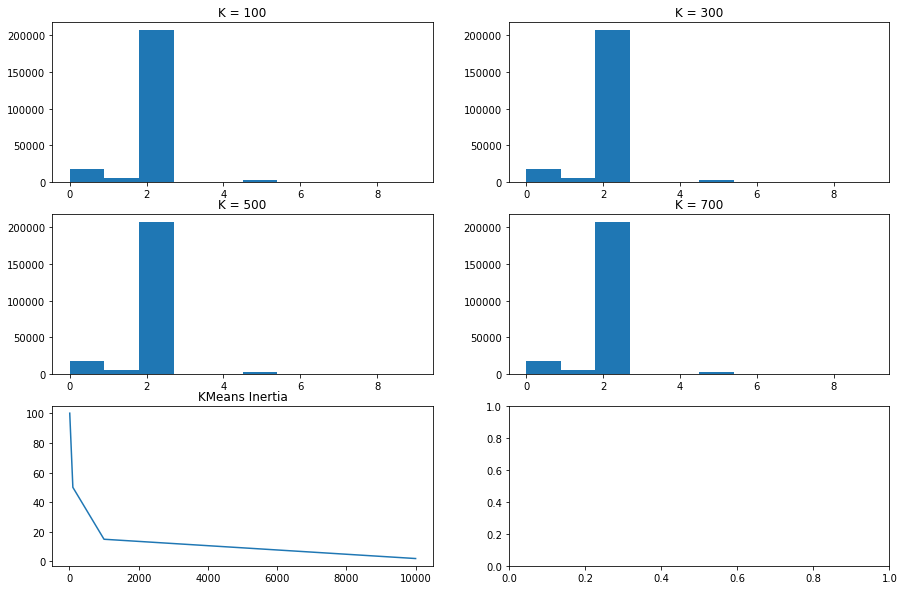

In [291]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

profiles_dummy_cluster = pd.read_csv('users_for_clustering.csv')

users_array = profiles_dummy_cluster.drop('user', axis = 1).values
users_array = preprocessing.normalize(users_array, axis = 0)

K = [100, 300, 500, 700]
labels = []
score = []
for i in range(len(K)):
    kmeans_users = KMeans(n_clusters=K[i], init='k-means++', n_init=10, max_iter=300)
    kmeans_users.fit(users_array)
    print "finish fit", i
    labels.append(kmeans_users.labels_)
    labels_df = pd.DataFrame(np.array(labels).T)
    labels_df.to_csv('user_labels1.csv')
    print "finish labeling", i
    score.append(kmeans_users.inertia_)
    print "Inertia score is: ", score


# plot label distribution and score
fig, ax = plt.subplots(3,2, figsize=(15,10))
ax[0][0].hist(labels[0])
ax[0][0].set_title('K = 100')
ax[0][1].hist(labels[0])
ax[0][1].set_title('K = 300')
ax[1][0].hist(labels[0])
ax[1][0].set_title('K = 500')
ax[1][1].hist(labels[0])
ax[1][1].set_title('K = 700')
plt.savefig('User_KMeans_tuning1.png')

In [34]:
user_labels = pd.read_csv('kmeans_output/user_labels_kmeans100.csv')
profiles_dummy_cluster = pd.read_csv('users_for_clustering.csv')

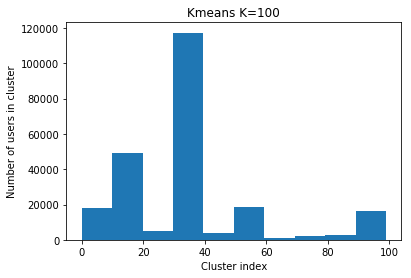

In [33]:
plt.hist(user_labels['user_cluster'])
plt.title('Kmeans K=100')
plt.xlabel('Cluster index')
plt.ylabel('Number of users in cluster')
# plt.savefig('Kmeans_100_hist.png')
plt.show()

# Calculate artist probability within user cluster

In [158]:
# read in training data
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_train.head()

,user,artist,plays
0,eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03,5a8e07d5-d932-4484-a7f7-e700793a9c94,554
1,44ce793a6cd9d20f13f4a576a818ef983314bb5d,a3a92047-be1c-4f3e-8960-c4f8570984df,81
2,da9cf3f557161d54b76f24db64be9cc76db008e3,eeb1195b-f213-4ce1-b28c-8565211f8e43,708
3,8fa49ab25d425edcf05d44bfc1d5aea895287d81,a1419808-65d3-4d40-998c-1a0bac65eabc,265
4,b85fcaef67d2669cd99b334b5e8c8705263db2cf,a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432,220


In [159]:
user_labels = pd.read_csv('kmeans_output/user_labels_kmeans100.csv')
user_labels.head()

,user_cluster,user
0,56,fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d
1,37,5909125332c108365a26ccf0ee62636eee08215c
2,37,d1867cbda35e0d48e9a8390d9f5e079c9d99ea96
3,11,63268cce0d68127729890c1691f62d5be5abd87c
4,10,02871cd952d607ba69b64e2e107773012c708113


In [160]:
artists_merge_dropcol = pd.read_csv('artists_labels.csv')

In [161]:
df_train = pd.merge(df_train, user_labels, how = 'inner', on = 'user')

In [162]:
artist_labels = pd.DataFrame({'artist': artists_merge_dropcol['artist'],
                             'artist_cluster': artists_merge_dropcol['cluster_label']})

In [163]:
artist_labels.head()

,artist,artist_cluster
0,03098741-08b3-4dd7-b3f6-1b0bfa2c879c,148
1,69c4cc43-8163-41c5-ac81-30946d27bb69,1
2,7a2e6b55-f149-4e74-be6a-30a1b1a387bb,73
3,7002bf88-1269-4965-a772-4ba1e7a91eaa,6
4,dbf7c761-e332-467b-b4d9-aafe06bbcf8f,1


In [164]:
df_train = pd.merge(df_train, artist_labels, how = 'inner', on = 'artist')

In [165]:
df_train.head()

,user,artist,plays,user_cluster,artist_cluster
0,eb1c57ddc9e0e2d005169d3a1a96e8dd95e3af03,5a8e07d5-d932-4484-a7f7-e700793a9c94,554,56,158
1,0ff4166398f035b5fcb8824cc16c8daeb4643911,5a8e07d5-d932-4484-a7f7-e700793a9c94,169,37,158
2,b3f9fa56429c3b7fd348c471452e65747ba9ed50,5a8e07d5-d932-4484-a7f7-e700793a9c94,292,93,158
3,0ffff52af79555e8fe72289c429b2fdfc8ea684b,5a8e07d5-d932-4484-a7f7-e700793a9c94,92,18,158
4,985253be0dc82ffa15a0ad006d0284aa4b7d1e3d,5a8e07d5-d932-4484-a7f7-e700793a9c94,159,56,158


In [166]:
df_train.to_csv('train_withlabels.csv')

In [155]:
df_train = df_train.drop(['user'], axis = 1)

In [156]:
df_train = df_train.drop(['artist'], axis = 1)

In [157]:
df_train.head()

,plays,user_cluster,artist_cluster
0,554,56,158
1,169,37,158
2,292,93,158
3,92,18,158
4,159,56,158


In [16]:
df_train['user_cluster'] = df_train['user_cluster'].astype('object')

In [17]:
df_train['artist_cluster'] = df_train['artist_cluster'].astype('object')

In [18]:
df_train_dummy = pd.get_dummies(df_train)

In [19]:
df_train_dummy.head()

,plays,user_cluster_0,user_cluster_1,user_cluster_2,user_cluster_3,user_cluster_4,user_cluster_5,user_cluster_6,user_cluster_7,user_cluster_8,...,artist_cluster_190,artist_cluster_191,artist_cluster_192,artist_cluster_193,artist_cluster_194,artist_cluster_195,artist_cluster_196,artist_cluster_197,artist_cluster_198,artist_cluster_199
0,554,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,159,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
print df_train_dummy.shape
df_train_dummy.to_csv('train_dummy_bothcluster.csv')

(4154804, 301)


In [9]:
df_test.head()

,Id,user,artist
0,1,306e19cce2522fa2d39ff5dfc870992100ec22d2,4ac4e32b-bd18-402e-adad-ae00e72f8d85
1,2,9450d351278df4938bdea4ed86aec940a4e927ac,1f574ab1-a46d-4586-9331-f0ded23e0411
2,3,801909d6955f59033c88595d3d7f8a6a5dcd53cc,3eb72791-6322-466b-87d3-24d74901eb2d
3,4,e3ed47445c127fbeff47fb58f6bbf2f3b4535d82,61604b45-8a91-4e33-a1b6-45d7b1fec4e5
4,5,a73f46652103f3a5f7429159310f6928f79644aa,5dfdca28-9ddc-4853-933c-8bc97d87beec


In [167]:
df_test = pd.merge(df_test, user_labels, how = 'inner', on = 'user')

df_test = pd.merge(df_test, artist_labels, how = 'inner', on = 'artist')

In [168]:
df_test.head()

,Id,user,artist,user_cluster,artist_cluster
0,1,306e19cce2522fa2d39ff5dfc870992100ec22d2,4ac4e32b-bd18-402e-adad-ae00e72f8d85,37,159
1,72280,3f407fff902ab403f06668f6be3d10bb9e9a02cd,4ac4e32b-bd18-402e-adad-ae00e72f8d85,43,159
2,1603775,695515d6dd26e15ed7b5134dd5452c1f97e630b7,4ac4e32b-bd18-402e-adad-ae00e72f8d85,37,159
3,1492441,c13655d6bc67d4b7dd8bbe5dc6b595723d358e19,4ac4e32b-bd18-402e-adad-ae00e72f8d85,37,159
4,3019912,afcc328e6db2b2f22b53f508d8d38222addbc0a2,4ac4e32b-bd18-402e-adad-ae00e72f8d85,37,159


In [169]:
df_test.to_csv('test_withlabels.csv')

In [23]:
# save ID
test_id = df_test['Id'].values

In [25]:
# drop ID
df_test = df_test.drop(['user'], axis = 1)
df_test = df_test.drop(['artist'], axis = 1)
df_test = df_test.drop(['Id'], axis = 1)

# change datatype for one-hot
df_test['user_cluster'] = df_test['user_cluster'].astype('object')
df_test['artist_cluster'] = df_test['artist_cluster'].astype('object')

df_test_dummy = pd.get_dummies(df_test)

In [26]:
df_test_dummy.head()

,user_cluster_0,user_cluster_1,user_cluster_2,user_cluster_3,user_cluster_4,user_cluster_5,user_cluster_6,user_cluster_7,user_cluster_8,user_cluster_9,...,artist_cluster_190,artist_cluster_191,artist_cluster_192,artist_cluster_193,artist_cluster_194,artist_cluster_195,artist_cluster_196,artist_cluster_197,artist_cluster_198,artist_cluster_199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_test = df_test_dummy.values

# random forest

In [31]:
X = df_train_dummy.iloc[:, 1:].values
y = df_train_dummy.iloc[:, 0].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
rf = RandomForest()
rf.fit(X_train[:50], y_train[:50])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
y_train_pred = rf.predict(X_test[:100])

In [ ]:
mean_absolute_error(y_train, y_train_pred)

In [41]:
prediction = pd.DataFrame({'Id': test_id[:100],
                          'plays': y_train_pred})

In [43]:
prediction.sort(['Id']).to_csv('prediction_p3.csv')

/Users/linyingzhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [ ]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,plays\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")
            
filename = "predictions_P3.csv"
write_to_file(filename,y_train_pred)

# Hiearchical clustering on users

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

profiles_dummy_cluster = pd.read_csv('users_for_clustering.csv')

users_array = profiles_dummy_cluster.drop('user', axis = 1).values
users_array = preprocessing.normalize(users_array, axis = 0)


K = 5
HAC = AgglomerativeClustering(n_clusters = K, compute_full_tree = False, 
                              memory = '/Users/linyingzhang/Documents/2017_Spring/CS181/cs181-s17-homeworks/p3')

labels = HAC.fit_predict(users_array)

labels_df = pd.DataFrame(np.array(labels).T)
labels_df.to_csv('userHAC_labels1.csv')

# PCA

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)

# df_x = df.iloc[:, 1:]
# df_y = df.iloc[:, 0]

# pca.fit(df_x)
# print(pca.explained_variance_ratio_) 

# Global_Median

In [12]:
import numpy as np
import csv

# Predict via the median number of plays.

train_file = 'train.csv'
test_file  = 'test.csv'
soln_file  = 'global_median.csv'

# Load the training data.
train_data = {}
with open(train_file, 'r') as train_fh:
    train_csv = csv.reader(train_fh, delimiter=',', quotechar='"')
    next(train_csv, None)
    for row in train_csv:
        user   = row[0]
        artist = row[1]
        plays  = int(row[2])
    
        if not user in train_data:
            train_data[user] = {}
        
        train_data[user][artist] = plays

# Compute the global median.
plays_array = []
for user, user_data in train_data.iteritems():
    for artist, plays in user_data.iteritems():
        plays_array.append(plays)
global_median = np.median(np.array(plays_array))
print "global median:", global_median

# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            soln_csv.writerow([id, global_median])


global median: 118.0


# User_Median

In [85]:
import numpy as np
import csv

# Predict via the user-specific median.
# If the user has no data, use the global median.

train_file = 'data/train.csv'
test_file  = 'data/test.csv'
soln_file  = 'data/user_median.csv'

# Load the training data.
train_data = {}
with open(train_file, 'r') as train_fh:
    train_csv = csv.reader(train_fh, delimiter=',', quotechar='"')
    next(train_csv, None)
    for row in train_csv:
        user   = row[0]
        artist = row[1]
        plays  = row[2]
    
        if not user in train_data:
            train_data[user] = {}
        
        train_data[user][artist] = int(plays)

# Compute the global median and per-user median.
plays_array  = []
user_medians = {}
for user, user_data in train_data.iteritems():
    user_plays = []
    for artist, plays in user_data.iteritems():
        plays_array.append(plays)
        user_plays.append(plays)

    user_medians[user] = np.median(np.array(user_plays))
global_median = np.median(np.array(plays_array))

# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            if user in user_medians:
                soln_csv.writerow([id, user_medians[user]])
            else:
                print "User", id, "not in training data."
                soln_csv.writerow([id, global_median])
                


# Weighted user-artist median

In [111]:
# read in training data
df_train = pd.read_csv("data/train.csv")
df_train.head()
df_train.shape

(4154804, 3)

In [171]:
df_train = pd.merge(df_train, user_labels, how = 'inner', on = 'user')
df_train = pd.merge(df_train, artist_labels, how = 'inner', on = 'artist')

In [172]:
# split train: validation = 0.7:0.3
train_size = df_train.shape[0]*0.7
train_idx = df_train.index
subtrain_idx = np.random.choice(train_idx, size = train_size, replace = False)
df_subtrain = df_train.iloc[subtrain_idx, :]
subtrain_array = df_train.index.isin(subtrain_idx)
df_validation = df_train[~subtrain_array]

df_subtrain.to_csv('data/subtrain.csv', index = False)
df_validation.to_csv('data/validation.csv')



/Users/linyingzhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [117]:
print df_subtrain.shape[0]
print df_validation.shape[0]
print df_validation.shape[0] + df_subtrain.shape[0]

2908362
1246442
4154804


In [122]:
import numpy as np
import csv

# Predict via the user-specific median.
# If the user has no data, use the global median.

train_file = 'data/subtrain.csv'
valid_file = 'data/validation.csv'
test_file  = 'data/test.csv'
soln_file  = 'data/user_artist_median.csv'

# Load the training data.
train_artist_data = {}
train_user_data = {}
with open(train_file, 'r') as train_fh:
    train_csv = csv.reader(train_fh, delimiter=',', quotechar='"')
    next(train_csv, None)
    for row in train_csv:
        user   = row[0]
        artist = row[1]
        plays  = row[2]
    
        if not artist in train_artist_data:
            train_artist_data[artist] = {}
        if not user in train_user_data:
            train_user_data[user] = {}
        
        train_artist_data[artist][user] = int(plays)
        train_user_data[user][artist] = int(plays)

In [123]:
# Compute the global median and per-user median.
plays_array  = []
user_medians = {}
for user, user_data in train_user_data.iteritems():
    user_plays = []
    for artist, plays in user_data.iteritems():
        plays_array.append(plays)
        user_plays.append(plays)

    user_medians[user] = np.median(np.array(user_plays))
global_median = np.median(np.array(plays_array))

# Compute the per-artist median.
plays_array  = []
artist_medians = {}
for artist, artist_data in train_artist_data.iteritems():
    artist_plays = []
    for user, plays in artist_data.iteritems():
        plays_array.append(plays)
        artist_plays.append(plays)

    artist_medians[artist] = np.median(np.array(artist_plays))
global_median = np.median(np.array(plays_array))

In [134]:
soln_file  = 'data/user_artist_median_valid4.csv'
test_file = 'data/validation.csv'
# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            if user in user_medians:
                if artist in artist_medians:
                    plays = 0.5*user_medians[user] + 0.5*artist_medians[artist]
                    soln_csv.writerow([id, plays])
                else:
                    plays = user_medians[user]
                    soln_csv.writerow([id, plays])
            if artist in artist_medians and user not in user_medians:
                plays = artist_medians[artist]
                soln_csv.writerow([id, plays])
            if artist not in artist_medians and user not in user_medians:
                print "User and artist", id, "not in training data."
                soln_csv.writerow([id, global_median])

In [140]:
# 0.8:0.2
user_artist_median_valid1 = pd.read_csv('data/user_artist_median_valid1.csv')
print mean_absolute_error(df_validation['plays'].values, user_artist_median_valid1['plays'].values)
# 0.7:0.3
user_artist_median_valid2 = pd.read_csv('data/user_artist_median_valid2.csv')
print mean_absolute_error(df_validation['plays'].values, user_artist_median_valid2['plays'].values)
# 0.6:0.4
user_artist_median_valid3 = pd.read_csv('data/user_artist_median_valid3.csv')
print mean_absolute_error(df_validation['plays'].values, user_artist_median_valid3['plays'].values)
# 0.5:0.5
user_artist_median_valid4 = pd.read_csv('data/user_artist_median_valid4.csv')
print mean_absolute_error(df_validation['plays'].values, user_artist_median_valid4['plays'].values)

140.770688167
143.541075277
147.812819048
153.561940106


In [146]:
soln_file  = 'data/artist_median_valid4.csv'
test_file = 'data/validation.csv'
# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            if user in user_medians:
                plays = user_medians[user]
                soln_csv.writerow([id, plays])
            if artist in artist_medians and user not in user_medians:
                print "hey"
                plays = 0.8*artist_medians[artist] + 0.2*global_median
                soln_csv.writerow([id, plays])
            if artist not in artist_medians and user not in user_medians:
                print "User and artist", id, "not in training data."
                soln_csv.writerow([id, global_median])

hey
hey
hey
hey
hey
hey
hey


In [145]:
#0.5
artist_median_valid1 = pd.read_csv('data/artist_median_valid1.csv')
print mean_absolute_error(df_validation['plays'].values, artist_median_valid1['plays'].values)
#0.6
artist_median_valid2 = pd.read_csv('data/artist_median_valid2.csv')
print mean_absolute_error(df_validation['plays'].values, artist_median_valid2['plays'].values)
#0.7
artist_median_valid3 = pd.read_csv('data/artist_median_valid3.csv')
print mean_absolute_error(df_validation['plays'].values, artist_median_valid3['plays'].values)
#0.8
artist_median_valid4 = pd.read_csv('data/artist_median_valid4.csv')
print mean_absolute_error(df_validation['plays'].values, artist_median_valid4['plays'].values)

139.874251871
139.874239475
139.87422708
139.874214685
